# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

In [22]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = f"{url}appid={weather_api_key}&units=imperial&q=yellowknife"
city_weather = requests.get(city_url).json()
city_weather['wind']['speed']

8.05

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=imperial&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]['all']
        city_wind = city_weather["wind"]['speed']
        city_country = city_weather["sys"]["country"]
        city_date = datetime.fromtimestamp(float(city_weather["dt"])+float(city_weather["timezone"])).strftime('%Y-%m-%d')

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | vinh
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | afaahiti
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | anadyr
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | klyuchi
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | kroya
Processing Record 13 of Set 1 | nova sintra
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | kuta
Processing Record 16 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 17 of Set 1 | pisco
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | hamilton
Processing Record 20 of Set 1 | hammerfest
Processing Record 21 of Set 1 | thompson
Pro

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,39.29,87,100,11.50,US,2025-04-12
1,vinh,18.6667,105.6667,66.97,88,100,5.68,VN,2025-04-12
2,stanley,54.8680,-1.6985,57.52,61,0,5.75,GB,2025-04-12
3,afaahiti,-17.7500,-149.2833,77.47,77,56,2.26,PF,2025-04-12
4,grytviken,-54.2811,-36.5092,45.91,84,63,16.75,GS,2025-04-12


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,39.29,87,100,11.50,US,2025-04-12
1,vinh,18.6667,105.6667,66.97,88,100,5.68,VN,2025-04-12
2,stanley,54.8680,-1.6985,57.52,61,0,5.75,GB,2025-04-12
3,afaahiti,-17.7500,-149.2833,77.47,77,56,2.26,PF,2025-04-12
4,grytviken,-54.2811,-36.5092,45.91,84,63,16.75,GS,2025-04-12


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

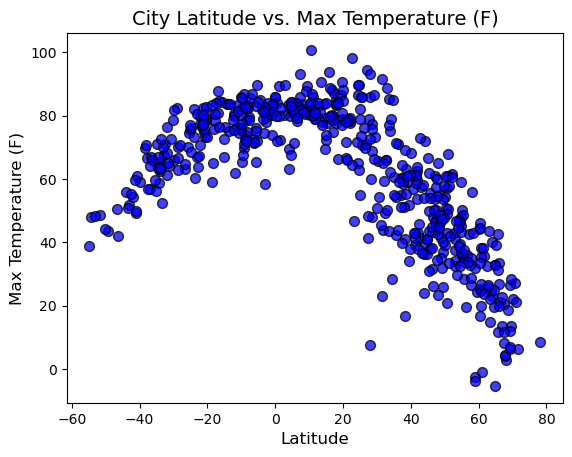

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75, s=50)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.title("City Latitude vs. Max Temperature (F)", fontsize=14)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

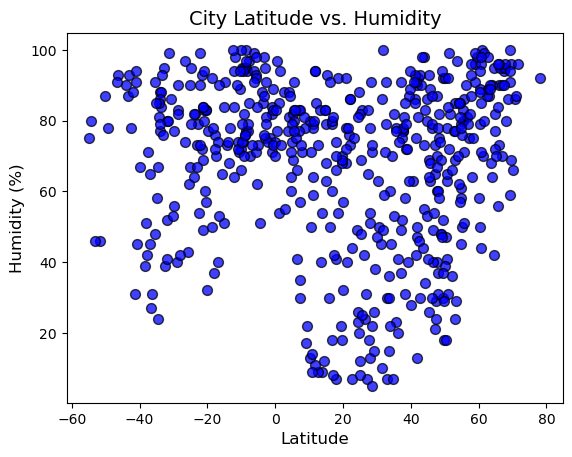

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75, s=50)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.title("City Latitude vs. Humidity", fontsize=14)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

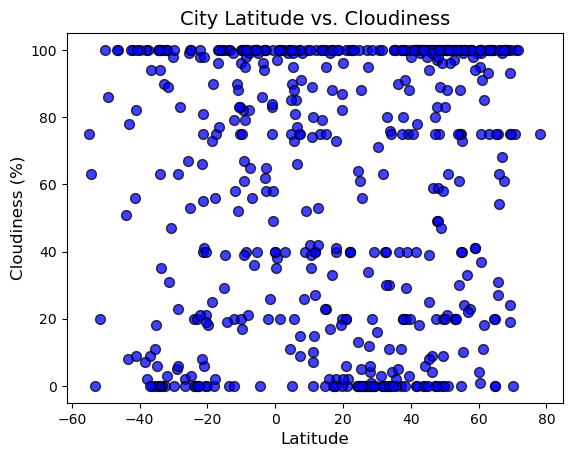

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75, s=50)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.title("City Latitude vs. Cloudiness", fontsize=14)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

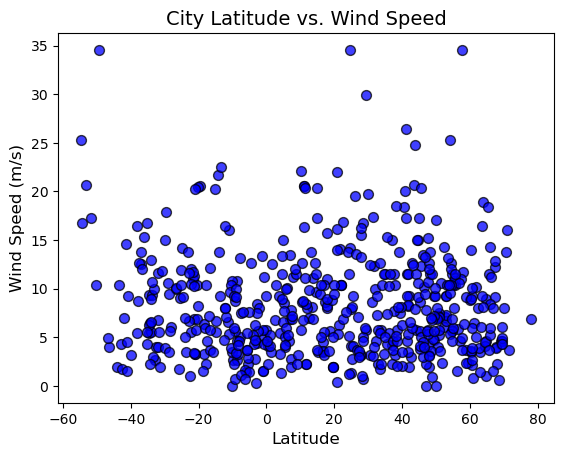

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75, s=50)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.title("City Latitude vs. Wind Speed", fontsize=14)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots
def linreg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return [rvalue,line_eq,regress_values]

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,39.29,87,100,11.50,US,2025-04-12
1,vinh,18.6667,105.6667,66.97,88,100,5.68,VN,2025-04-12
2,stanley,54.8680,-1.6985,57.52,61,0,5.75,GB,2025-04-12
5,anadyr,64.7500,177.4833,-3.50,77,0,8.95,RU,2025-04-13
6,jamestown,42.0970,-79.2353,42.42,91,100,9.22,US,2025-04-12


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,afaahiti,-17.7500,-149.2833,77.47,77,56,2.26,PF,2025-04-12
4,grytviken,-54.2811,-36.5092,45.91,84,63,16.75,GS,2025-04-12
7,edinburgh of the seven seas,-37.0676,-12.3116,56.88,65,9,12.57,SH,2025-04-12
9,port-aux-francais,-49.3500,70.2167,43.47,78,86,34.56,TF,2025-04-12
10,kroya,-7.6331,109.2461,78.44,95,82,4.99,ID,2025-04-12


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7285739985854316


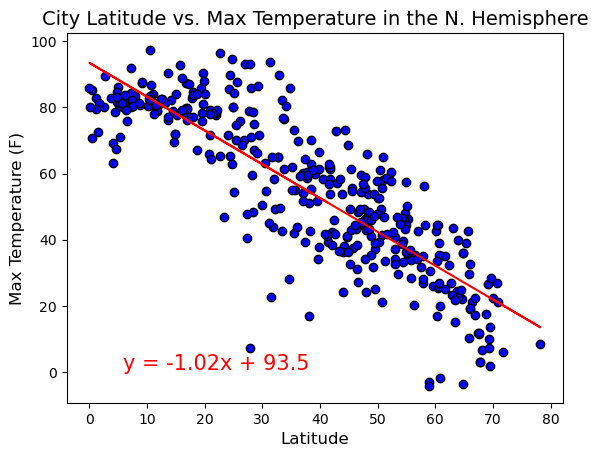

In [39]:
# Linear regression on Northern Hemisphere
(nhtr,nhtreq,nhtval)=linreg(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northern_hemi_df["Lat"],nhtval,color="red")
plt.annotate(nhtreq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.title("City Latitude vs. Max Temperature in the N. Hemisphere", fontsize=14)
print(f"The r-squared is: {nhtr**2}")

The r-squared is: 0.598815799758959


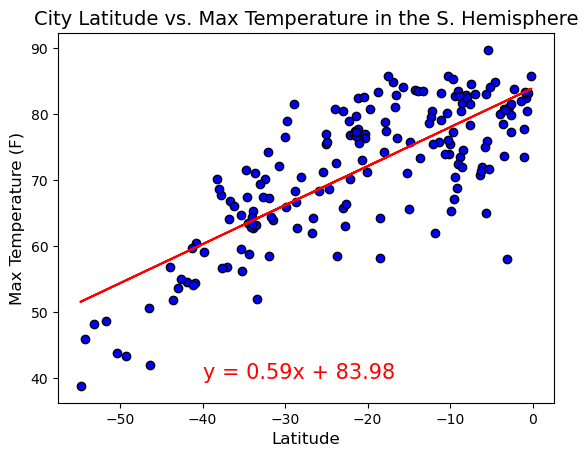

In [48]:
# Linear regression on Southern Hemisphere
(shtr,shtreq,shtval)=linreg(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southern_hemi_df["Lat"],shtval,color="red")
plt.annotate(shtreq,(-40,40),fontsize=15,color="red")
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.title("City Latitude vs. Max Temperature in the S. Hemisphere", fontsize=14)
print(f"The r-squared is: {shtr**2}")

**Discussion about the linear relationship:** The Max temperature linearly grows higher the closer the latitude gets to the equator--which makes sense, as, generally the equatorial areas are closer to the sun, therefore warmer.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.05049960525885732


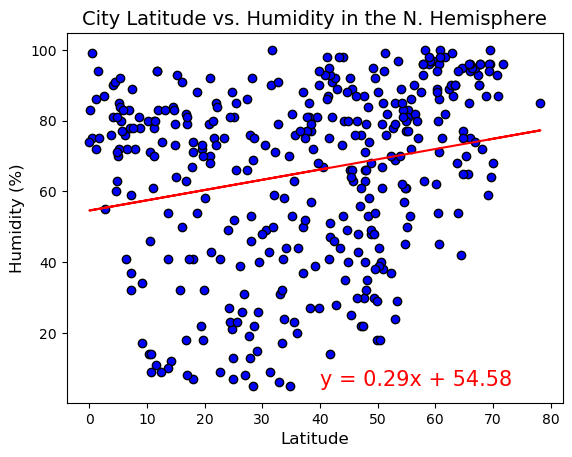

In [55]:
# Northern Hemisphere
(nhhr,nhhreq,nhhval)=linreg(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northern_hemi_df["Lat"],nhhval,color="red")
plt.annotate(nhhreq,(40,5),fontsize=15,color="red")
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.title("City Latitude vs. Humidity in the N. Hemisphere", fontsize=14)
print(f"The r-squared is: {nhhr**2}")

The r-squared is: 0.07908527568667988


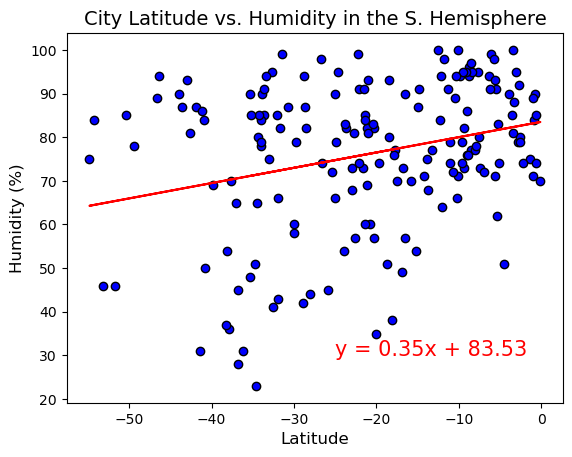

In [52]:
# Southern Hemisphere
(shhr,shhreq,shhval)=linreg(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southern_hemi_df["Lat"],shhval,color="red")
plt.annotate(shhreq,(-25,30),fontsize=15,color="red")
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.title("City Latitude vs. Humidity in the S. Hemisphere", fontsize=14)
print(f"The r-squared is: {shhr**2}")

**Discussion about the linear relationship:** There appears to be a steady upward linear reltationship between latitude and humidity, with an abrupt drop around the equator. The suddenly drop between regression lines may be a product of what current seasons the southern hemisphere may be experiencing at the moment, for example if there are cities that are experiencing rainy seasons, this would skew the data upwards. This is on top of the fact that the southern hemisphgere is, in general, warmer than the northern, allowing for more humidity to hang in the air.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.023514031740173042


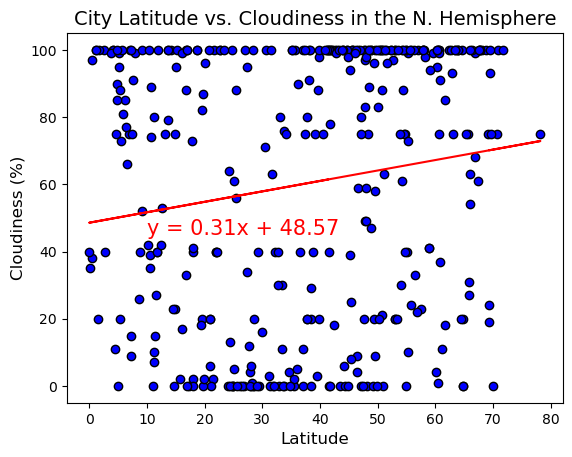

In [60]:
# Northern Hemisphere
(nhcr,nhcreq,nhcval)=linreg(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northern_hemi_df["Lat"],nhcval,color="red")
plt.annotate(nhcreq,(10,45),fontsize=15,color="red")
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.title("City Latitude vs. Cloudiness in the N. Hemisphere", fontsize=14)
print(f"The r-squared is: {nhcr**2}")

The r-squared is: 0.0332228249141282


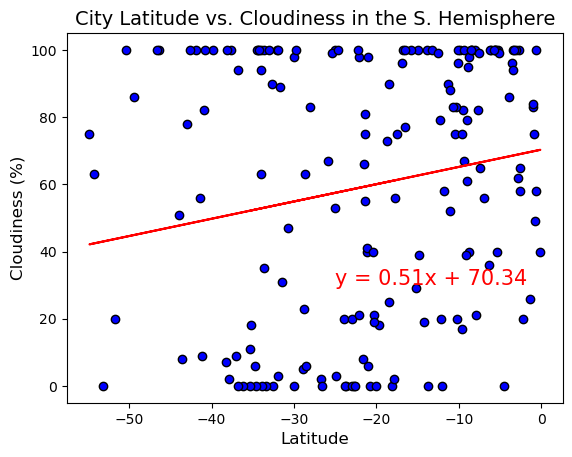

In [61]:
# Southern Hemisphere
(shcr,shcreq,shcval)=linreg(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southern_hemi_df["Lat"],shcval,color="red")
plt.annotate(shcreq,(-25,30),fontsize=15,color="red")
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.title("City Latitude vs. Cloudiness in the S. Hemisphere", fontsize=14)
print(f"The r-squared is: {shcr**2}")

**Discussion about the linear relationship:** The linear relationships for Cloudiness do not seem to hold much value, as they are just sandwiched between lines of data at 100% and 0%. This may also be because determining how cloudy it is feels a bit subjective to quantify between clear skies (0%) and overcast (100%)

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0024581480124037597


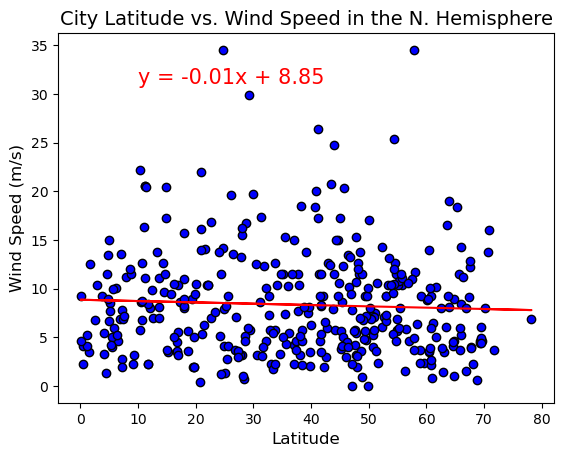

In [67]:
# Northern Hemisphere
(nhwr,nhwreq,nhwval)=linreg(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northern_hemi_df["Lat"],nhwval,color="red")
plt.annotate(nhwreq,(10,31),fontsize=15,color="red")
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.title("City Latitude vs. Wind Speed in the N. Hemisphere", fontsize=14)
print(f"The r-squared is: {nhwr**2}")

The r-squared is: 0.0968436267573882


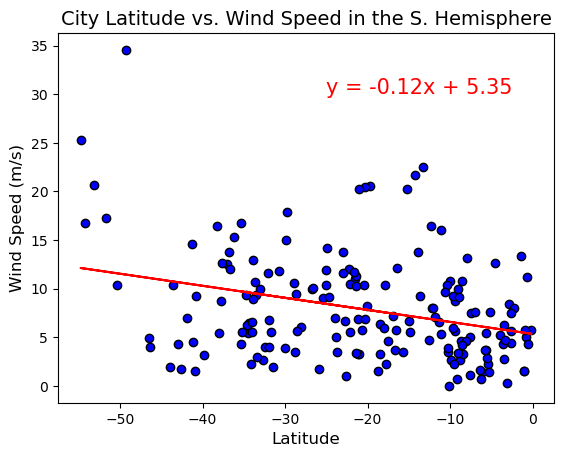

In [68]:
# Southern Hemisphere
(shwr,shwreq,shwval)=linreg(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southern_hemi_df["Lat"],shwval,color="red")
plt.annotate(shwreq,(-25,30),fontsize=15,color="red")
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.title("City Latitude vs. Wind Speed in the S. Hemisphere", fontsize=14)
print(f"The r-squared is: {shwr**2}")

**Discussion about the linear relationship:** There is slight downward trend of wind speed vs latitude, the lowest latitudes being exclusively windy, whereas the rest vary a bit more, but with pronounced concentrations along the lower speeds.